In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path

In [2]:
#load in average readmissions data and read
average_readmission_clean_csv = Path("Output/Average_Readmission_Clean.csv")
average_readmission_clean = pd.read_csv(average_readmission_clean_csv)
average_readmission_clean

,state,Race,% Readmission
0,ALABAMA,American Indian/Alaska native,15.767442
1,ALABAMA,Asian/Pacific islander,15.480000
2,ALABAMA,Black,15.403689
3,ALABAMA,Hispanic,15.300654
4,ALABAMA,Other,15.555556
...,...,...,...
303,WYOMING,Asian/Pacific islander,15.181818
304,WYOMING,Black,15.000000
305,WYOMING,Hispanic,14.988764
306,WYOMING,Other,15.062500


In [3]:
#convert to dataframe
average_readmission_clean_df = pd.DataFrame(average_readmission_clean)
#find average readmission rate per state --- so we can find top 5 states and bottom 5 states (%readmisson)
avg_readmissions_by_state = average_readmission_clean_df.groupby('state')['% Readmission'].mean()
avg_read_state_df = pd.DataFrame(avg_readmissions_by_state)
avg_read_state_df.head(10)

,% Readmission
state,
ALABAMA,15.478021
ALASKA,14.172724
ARIZONA,15.015916
ARKANSAS,15.829309
CALIFORNIA,15.387323
COLORADO,14.612978
CONNECTICUT,16.042437
DELAWARE,15.629630
DISTRICT OF COLUMBIA,16.743056


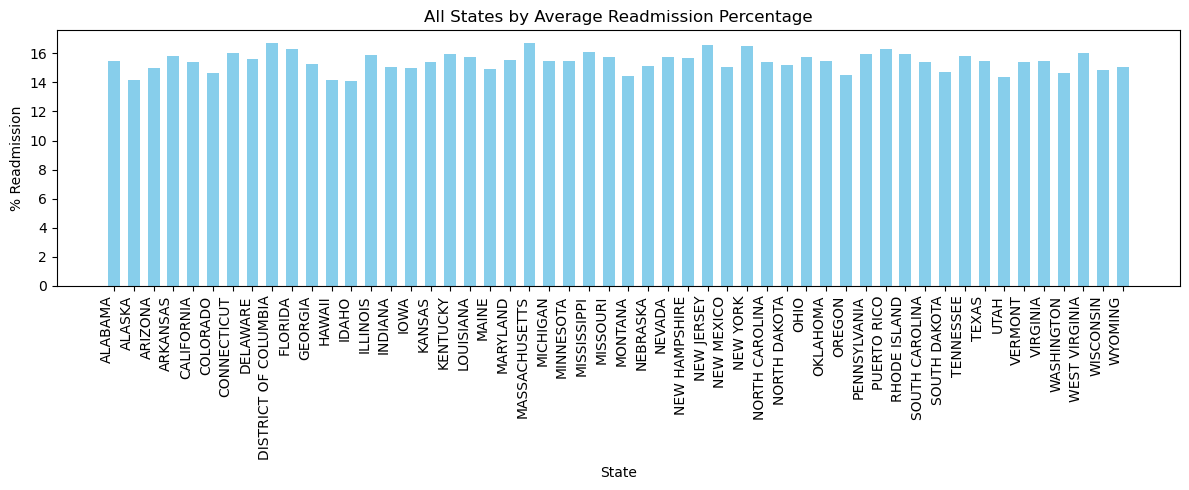

In [4]:
plt.figure(figsize=(12, 5))
plt.bar(avg_read_state_df.index, avg_read_state_df['% Readmission'], color='skyblue', width=0.6)
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('All States by Average Readmission Percentage')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()
#REMOVE THIS IF UGLY OR WE DONT NEED (cant make x axis look any better)
#you can use this to say "look, it looks like all of the bars are uniform (no real difference)"

In [5]:
#Get top 5 states by %Readmission
top_sorted_states = avg_readmissions_by_state.sort_values(ascending=False)
# Get the top 5 states
top_5_states = top_sorted_states.head(5)
top_5_states_df = pd.DataFrame(top_5_states)
top_5_states_df

,% Readmission
state,
DISTRICT OF COLUMBIA,16.743056
MASSACHUSETTS,16.706773
NEW JERSEY,16.568565
NEW YORK,16.498212
PUERTO RICO,16.321096


In [6]:
#Get bottom 5 states by %Readmission
bottom_sorted_states = avg_readmissions_by_state.sort_values(ascending=True)
# Get the bottom 5 states
bottom_5_states = bottom_sorted_states.head(5)
bottom_5_states_df = pd.DataFrame(bottom_5_states)
bottom_5_states_df

,% Readmission
state,
IDAHO,14.127872
HAWAII,14.171429
ALASKA,14.172724
UTAH,14.367306
MONTANA,14.415143


In [7]:
#you can do general analytics looking at these two data frames
#these are just to visualize the %AvReadmissionPerState (independent of race)

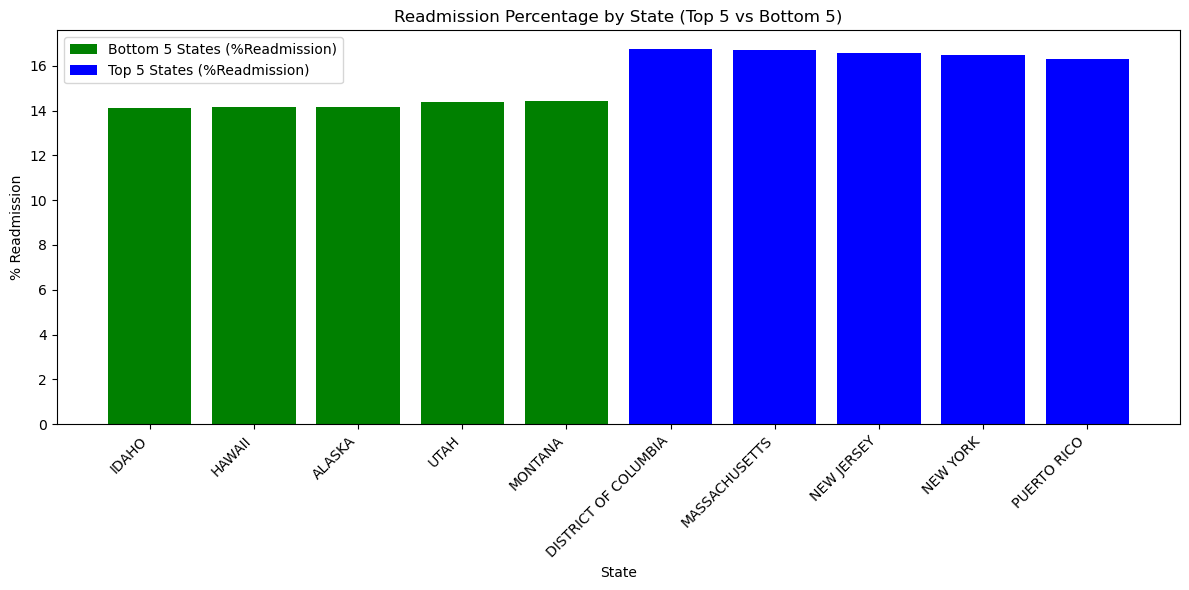

In [8]:
plt.figure(figsize=(12, 6))

# Plot bottom_5 data with green bars
plt.bar(bottom_5_states_df.index, bottom_5_states_df['% Readmission'], color='green', width=0.8, label='Bottom 5 States (%Readmission)')

# Plot top_5 data with blue bars
plt.bar(top_5_states_df.index, top_5_states_df['% Readmission'], color='blue', width=0.8, label='Top 5 States (%Readmission)')

# Adding labels and title
plt.xlabel('State')
plt.ylabel('% Readmission')
plt.title('Readmission Percentage by State (Top 5 vs Bottom 5)')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Show legend with labels for each set of bars
plt.tight_layout()
plt.show()